In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/gaurav/Desktop/Hinglish/data/data3.csv")

In [3]:
df[df['Tweet'].isnull()]

,ID,Tweet,Sentiment Polarity
70,15581,NaN,neutral
635,42081,NaN,neutral
1199,43574,NaN,neutral
1912,42731,NaN,neutral
2634,9127,NaN,neutral
3034,35448,NaN,neutral
9116,2600,NaN,neutral
13193,11567,NaN,neutral
15978,4692,NaN,neutral


In [4]:
for i in range(len(df)):
    if(type(df['Tweet'][i]) !=str):
        df['Tweet'][i] = df['Sentiment Polarity'][i]

/Users/gaurav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
df[df['Tweet'].isnull()]

,ID,Tweet,Sentiment Polarity


# Count Vectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 1))
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
X_train.shape

(14000, 21603)

In [9]:
X_test.shape

(3000, 21603)

In [10]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6216666666666667
F1-Score =  0.6252936784599569
[[591 229  80]
 [244 611 245]
 [ 67 270 663]]


In [11]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data3-1.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

<Figure size 1000x600 with 1 Axes>

Best K value =  1


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5126666666666667
F1-Score =  0.4993493244509486
[[289 497 114]
 [122 758 220]
 [ 81 428 491]]


In [13]:
from sklearn.tree import DecisionTreeClassifier 


In [14]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [15]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [16]:
y_pred = dtree_model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5816666666666667
F1-Score =  0.5839602128606473
[[578 243  79]
 [314 524 262]
 [108 249 643]]


In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [19]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.47
F1-Score =  0.45493998854915985
[[654 150  96]
 [588 230 282]
 [332 142 526]]


In [21]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6633333333333333
F1-Score =  0.6615099758369881
[[689 164  47]
 [316 524 260]
 [ 55 168 777]]


In [22]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [23]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [24]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6576666666666666
F1-Score =  0.662184701562778
[[605 243  52]
 [212 658 230]
 [ 37 253 710]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [26]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

8.424849704901378  minutes


In [27]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.659
F1-Score =  0.6633683024968188
[[567 294  39]
 [198 715 187]
 [ 47 258 695]]


# One Hot Binarizer

In [28]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [29]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.624
F1-Score =  0.6277235116850656
[[597 232  71]
 [258 598 244]
 [ 58 265 677]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


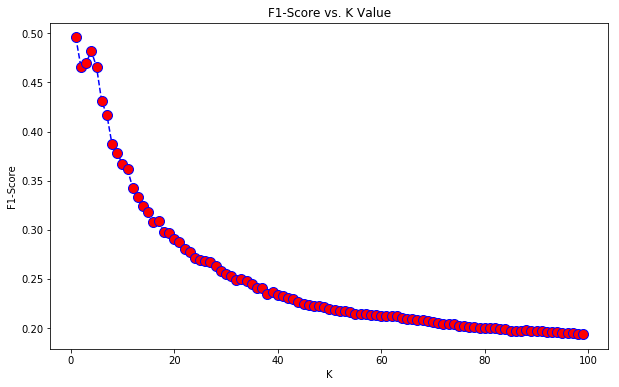

Best K value =  1


In [31]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data3-2.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.512
F1-Score =  0.4958236222655499
[[268 521 111]
 [115 767 218]
 [ 78 421 501]]


In [33]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5853333333333334
F1-Score =  0.5869544189305858
[[584 228  88]
 [306 526 268]
 [118 236 646]]


In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4676666666666667
F1-Score =  0.4524371421268399
[[656 148  96]
 [600 227 273]
 [340 140 520]]


In [35]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.656
F1-Score =  0.6541526880797153
[[686 169  45]
 [316 513 271]
 [ 58 173 769]]


In [36]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.655
F1-Score =  0.6595822024842798
[[600 250  50]
 [218 654 228]
 [ 35 254 711]]


In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

8.122549748420715  minutes
Accuracy Score =  0.66
F1-Score =  0.6638002900389014
[[563 291  46]
 [194 709 197]
 [ 46 246 708]]


# Tf-IDF Vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()
features2 = tfidf.fit_transform(df['Tweet'])

In [39]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [40]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6623333333333333
F1-Score =  0.666777508089651
[[631 232  37]
 [263 638 199]
 [ 36 246 718]]


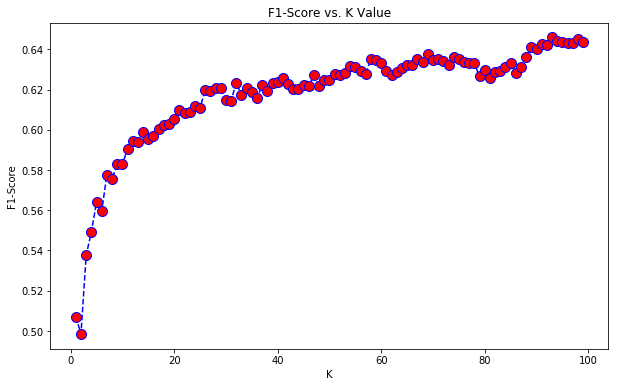

Best K value =  93


In [41]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data3-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6463333333333333
F1-Score =  0.6458768250831785
[[564 262  74]
 [215 578 307]
 [ 41 162 797]]


In [43]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5853333333333334
F1-Score =  0.5874021047967487
[[544 260  96]
 [284 544 272]
 [ 84 248 668]]


In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4653333333333333
F1-Score =  0.4537494661860146
[[608 182 110]
 [549 245 306]
 [300 157 543]]


In [45]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.67
F1-Score =  0.6747383121596582
[[591 274  35]
 [189 676 235]
 [ 23 234 743]]


In [46]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.67
F1-Score =  0.6747383121596582
[[591 274  35]
 [189 676 235]
 [ 23 234 743]]


In [47]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6753333333333333
F1-Score =  0.6794762649974325
[[610 248  42]
 [214 681 205]
 [ 33 232 735]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0)
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

8.085884165763854  minutes
Accuracy Score =  0.659
F1-Score =  0.6630527234973921
[[556 303  41]
 [197 713 190]
 [ 41 251 708]]
